#Подготовка


In [3]:
from google import drive

drive.mount('/content/gdrive', force_remount=True)

ImportError: cannot import name 'drive' from 'google' (unknown location)

In [1]:
import os, sys

from keras.engine import Input
from keras.engine import Model
from keras.layers import Dropout, Dense, Flatten, Conv1D, MaxPooling1D, Concatenate, LSTM, MaxPooling2D
from keras.optimizers import Adam
from keras import backend as K
import tensorflow as tf
import nltk

from timeit import default_timer as timer

import csv
import re
import random
from random import randint

from random import shuffle

import numpy as np
from nltk.corpus import stopwords

# Download russian stop-words
nltk.download('stopwords')

# Download dataset
!wget --continue -O /content/data.csv https://www.dropbox.com/s/xsrdgu293i8ie86/data.csv?dl=0

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Илья\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
"wget" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [2]:
cd gdrive/MyDrive/colab/

[WinError 3] Системе не удается найти указанный путь: 'gdrive/MyDrive/colab/'
C:\Users\Илья


In [3]:
import pandas as pd 
  
# Read IND_data.csv into a DataFrame, assigned to df 
months1 = pd.read_csv("months1.csv", sep=';', encoding='cp1251') 
months2 = pd.read_csv("months2.csv", sep=';', encoding='cp1251') 
df = months1.append(months2)
df = df.reset_index()
# Prints the first 5 rows of a DataFrame as default 
df.head() 

# Prints no. of rows and columns of a DataFrame 
df

index              Дата     ДатаДоставки НомерЗаказаНаСайте  \
0             0   01.07.2017 0:00  06.07.2017 0:00         5031788_TR   
1             1   01.07.2017 0:00  06.07.2017 0:00         5031788_TR   
2             2   01.07.2017 0:00  06.07.2017 0:00         5031788_TR   
3             3   01.07.2017 0:00  06.07.2017 0:00         5031788_TR   
4             4   01.07.2017 0:00  06.07.2017 0:00         5031788_TR   
...         ...               ...              ...                ...   
1673262  876070  31.10.2017 23:59  02.11.2017 0:00         6005071_ES   
1673263  876071  31.10.2017 23:59  02.11.2017 0:00         6005071_ES   
1673264  876072  31.10.2017 23:59  03.11.2017 0:00         6005077_ES   
1673265  876073  31.10.2017 23:59  03.11.2017 0:00         6005089_ES   
1673266  876074  31.10.2017 23:59  03.11.2017 0:00         6005101_ES   

            НовыйСтатус СуммаЗаказаНаСайте СуммаДокумента МетодДоставки  \
0             Доставлен              1 634          1 634      Магазины   
1             Доставлен              1 634          1 634      Магазины   
2             Доставлен              1 634          1 634      Магазины   
3             Доставлен              1 634          1 634      Магазины   
4             Доставлен              1 634          1 634      Магазины   
...                 ...                ...            ...           ...   
1673262      К отгрузке              3 222          3 222    Курьерская   
1673263      К отгрузке              3 222          3 222    Курьерская   
1673264  Возврат из ПВЗ              2 564          2 564      Магазины   
1673265  Возврат из ПВЗ              2 564          2 564      Магазины   
1673266       Доставлен                848            848      Магазины   

         ФормаОплаты  Регион  ... СуммаДоставки НомерСтроки  \
0        Безналичная  Москва  ...            49           3   
1        Безналичная  Москва  ...            49           4   
2        Безналичная  Москва  ...            49           7   
3        Безналичная  Москва  ...            49           1   
4        Безналичная  Москва  ...            49           9   
...              ...     ...  ...           ...         ...   
1673262     Наличная  Москва  ...           150           3   
1673263     Наличная  Москва  ...           150           2   
1673264  Безналичная  Москва  ...             0           1   
1673265  Безналичная  Москва  ...             0           1   
1673266  Безналичная  Москва  ...             0           1   

        КоличествоПроданоКлиенту ДатаЗаказаНаСайте              Телефон_new  \
0                              1   30.06.2017 0:00  55574948-52495050484877   
1                              1   30.06.2017 0:00  55574948-52495050484877   
2                              1   30.06.2017 0:00  55574948-52495050484877   
3                              1   30.06.2017 0:00  55574948-52495050484877   
4                              1   30.06.2017 0:00  55574948-52495050484877   
...                          ...               ...                      ...   
1673262                        2   31.10.2017 0:00  55574953-52575355515475   
1673263                        2   31.10.2017 0:00  55574953-52575355515475   
1673264                        0   31.10.2017 0:00  55574857-54545754565577   
1673265                        0   31.10.2017 0:00  55574857-54545754565577   
1673266                        2   31.10.2017 0:00  55575054-56564948515679   

          ЭлектроннаяПочта_new   Клиент          ID_SKU  ГородМагазина  \
0          116117_tu17@mail.ru  Татьяна  IDL00051334048              0   
1          116117_tu17@mail.ru  Татьяна  IDL00051367351              0   
2          116117_tu17@mail.ru  Татьяна  IDL00007611755              0   
3          116117_tu17@mail.ru  Татьяна  IDL00014478250              0   
4          116117_tu17@mail.ru  Татьяна  IDL00001209351              0   
...                        ...      ...             ...            ...   
1673262 

In [4]:
df.isnull().sum() / df.shape[0] * 100.00

index                        0.000000
Дата                         0.000000
ДатаДоставки                 0.073509
НомерЗаказаНаСайте           0.000000
НовыйСтатус                  0.000000
СуммаЗаказаНаСайте           0.000000
СуммаДокумента               0.000000
МетодДоставки                0.006813
ФормаОплаты                  0.006933
Регион                       0.588370
Группа2                     19.430432
Группа3                     19.430432
Группа4                     22.785903
Тип                          0.000000
Номенклатура                 0.000000
ТипТовара                   19.430432
Отменено                     0.000000
ПричинаОтмены               90.237482
Количество                   0.000000
Цена                         0.000000
СуммаСтроки                  0.000000
ЦенаЗакупки                 19.719865
МесяцДатыЗаказа              0.000000
ГодДатыЗаказа                0.000000
ПВЗ_код                     26.459734
Статус                       0.000000
Гео         

In [3]:
from keras.models import model_from_json

K.set_learning_phase(0)
with open(os.path.join('model.json'), 'r') as fp:
    model = model_from_json(fp.read())

model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])
model.load_weights(os.path.join('model.h5'))

def format_out(out, dict):
    stringify = np.vectorize(lambda x: '{}: {:0.2f}'.format(dict[x], out[x]))
    return ', '.join(stringify(np.argsort(-out)))
    return ""

def predict(m, word):
    out = m.predict(np.array([word2input(word, 50)]))
    indMax = np.argmax(out[0])
    return SEX_DICT_REVERSE[indMax]

Instructions for updating:
Simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


In [4]:
letters = "@ABCDEFGHIJKLMNOPQRSTUVWXYZАБВГДЕЁЖЗИЙКЛМНОПРСТУФХЦЧШЩЪЫЬЭЮЯ0123456789.,!? -"
LETTERS_FOR_RANDOM = "АБВГДЕЁЖЗИЙКЛМНОПРСТУФХЦЧШЩЪЫЬЭЮЯ0123456789.,!?    -"
dictSize = len(letters)
maxlen = 50
print("Total letters: " + str(dictSize))

SEX_DICT = {'unknown': 0, 'Мужчины': 1, 'Женщины': 2}
SEX_DICT_REVERSE = {0: 'unknown', 1: 'Мужчины', 2: 'Женщины'}


def sparse(n, size):
    out = [0.0] * size
    if int(n) >= size:
        print("{} {}".format(n, size))
    out[int(n)] = 1.0
    return out

def chartoindex(c):
    c = c.upper()
    if (c not in letters):
        print("Incorrect letter: " + c)
        return 0
    return letters.index(c)


def word2input(word, maxsize):
    word = word.upper()
    word = re.sub('[^0-9A-ZА-Я ]+', '', word)
    input = list(map(lambda c: sparse(chartoindex(c), dictSize), word.upper().replace(" ", "")))
    input += [sparse(dictSize - 1, dictSize)] * (maxsize - len(input))
    return list(input)

def loadFile(file):
    with open(file, encoding='utf-8') as fp:
        data = csv.reader(fp, delimiter=',')
        data = list(data)
        return data

def getPatch(data, count):
    print("Preparing dataSet...")
    max_input = 0
    sexOutput = list()
    input = list()
    stopWords = stopwords.words('russian')
    counter = 0

    shuffle(data)
    for row in data:
        if (counter > count):
            break
        if (row[3].strip() in SEX_DICT ):
            max_input = max(max_input, len(row[0]))

            r = randint(0, 10)
            r2 = randint(0, 1)
            if r < 7:
                if r == 0:
                    text = row[1].strip()
                elif r < 4:
                    if (r2 == 0):
                        text = (row[0] + " " + row[1] + " " + row[2]).strip()
                    else:
                        text = (row[1] + " " + row[0] + " " + row[2]).strip()
                elif r < 6:
                    if (r2 == 0):
                        text = (row[0] + " " + row[1]).strip()
                    else:
                        text = (row[1] + " " + row[0]).strip()
                else:
                    if (r2 == 0):
                        text = (row[1] + " " + row[2]).strip()
                    else:
                        text = (row[2] + " " + row[1]).strip()

                if len(text) < maxlen:
                    input.append(word2input(text, maxlen))
                    sexOutput.append(sparse(SEX_DICT[row[3].strip()], len(SEX_DICT)))
            else:
                if r == 7:
                    text = random.choice(stopWords)
                elif r == 8:
                    text = random.choice(stopWords) + " " + random.choice(stopWords)
                elif r == 9: # Random string
                    N = r = randint(2, 15)
                    text = ''.join(random.choices(LETTERS_FOR_RANDOM, k=N))
                else:
                    text = random.choice(stopWords) + " " + random.choice(stopWords) + " " + random.choice(stopWords)
                text = text.strip().upper()
                if len(text) < maxlen:
                    input.append(word2input(text, maxlen))
                    sexOutput.append(sparse(SEX_DICT["unknown"], len(SEX_DICT)))

            counter += 1
            if (counter % 30000 == 0):
                print(text)

    x = np.array(input)
    x = x.astype('float32')
    slices = [int(0.8 * len(x)), len(x)]
    x_train, x_test, _ = np.split(x, slices)
    action_output_train, action_output_test,            _ = np.split(sexOutput, slices)

    return [x_train, x_test,
            action_output_train, action_output_test]

Total letters: 76


#@Преобразование данных


Добавление пола

In [5]:
gender = pd.DataFrame()
gender['Клиент'] = df['Клиент'].unique()
gender['Пол'] = gender.apply(lambda x: 'Гость' if str(x.Клиент)=='Гость' else predict(model, str(x.Клиент)), axis = 1)
gender = gender.set_index('Клиент')
gender = gender.to_dict()['Пол']
df['Пол'] = df.apply(lambda x: gender[x.Клиент], axis = 1)

Удаление ненужных столбцов

In [7]:
df.drop(columns=['ГородМагазина', 'МагазинЗаказа'])

index              Дата     ДатаДоставки НомерЗаказаНаСайте  \
0             0   01.07.2017 0:00  06.07.2017 0:00         5031788_TR   
1             1   01.07.2017 0:00  06.07.2017 0:00         5031788_TR   
2             2   01.07.2017 0:00  06.07.2017 0:00         5031788_TR   
3             3   01.07.2017 0:00  06.07.2017 0:00         5031788_TR   
4             4   01.07.2017 0:00  06.07.2017 0:00         5031788_TR   
...         ...               ...              ...                ...   
1673262  876070  31.10.2017 23:59  02.11.2017 0:00         6005071_ES   
1673263  876071  31.10.2017 23:59  02.11.2017 0:00         6005071_ES   
1673264  876072  31.10.2017 23:59  03.11.2017 0:00         6005077_ES   
1673265  876073  31.10.2017 23:59  03.11.2017 0:00         6005089_ES   
1673266  876074  31.10.2017 23:59  03.11.2017 0:00         6005101_ES   

            НовыйСтатус СуммаЗаказаНаСайте СуммаДокумента МетодДоставки  \
0             Доставлен              1 634          1 634      Магазины   
1             Доставлен              1 634          1 634      Магазины   
2             Доставлен              1 634          1 634      Магазины   
3             Доставлен              1 634          1 634      Магазины   
4             Доставлен              1 634          1 634      Магазины   
...                 ...                ...            ...           ...   
1673262      К отгрузке              3 222          3 222    Курьерская   
1673263      К отгрузке              3 222          3 222    Курьерская   
1673264  Возврат из ПВЗ              2 564          2 564      Магазины   
1673265  Возврат из ПВЗ              2 564          2 564      Магазины   
1673266       Доставлен                848            848      Магазины   

         ФормаОплаты  Регион  ... СуммаУслуг СуммаДоставки НомерСтроки  \
0        Безналичная  Москва  ...         49            49           3   
1        Безналичная  Москва  ...         49            49           4   
2        Безналичная  Москва  ...         49            49           7   
3        Безналичная  Москва  ...         49            49           1   
4        Безналичная  Москва  ...         49            49           9   
...              ...     ...  ...        ...           ...         ...   
1673262     Наличная  Москва  ...        150           150           3   
1673263     Наличная  Москва  ...        150           150           2   
1673264  Безналичная  Москва  ...          0             0           1   
1673265  Безналичная  Москва  ...          0             0           1   
1673266  Безналичная  Москва  ...          0             0           1   

        КоличествоПроданоКлиенту ДатаЗаказаНаСайте              Телефон_new  \
0                              1   30.06.2017 0:00  55574948-52495050484877   
1                              1   30.06.2017 0:00  55574948-52495050484877   
2                              1   30.06.2017 0:00  55574948-52495050484877   
3                              1   30.06.2017 0:00  55574948-52495050484877   
4                              1   30.06.2017 0:00  55574948-52495050484877   
...                          ...               ...                      ...   
1673262                        2   31.10.2017 0:00  55574953-52575355515475   
1673263                        2   31.10.2017 0:00  55574953-52575355515475   
1673264                        0   31.10.2017 0:00  55574857-54545754565577   
1673265                        0   31.10.2017 0:00  55574857-54545754565577   
1673266                        2   31.10.2017 0:00  55575054-56564948515679   

          ЭлектроннаяПочта_new   Клиент          ID_SKU      Пол  
0          116117_tu17@mail.ru  Татьяна  IDL00051334048  Женщины  
1          116117_tu17@mail.ru  Татьяна  IDL00051367351  Женщины  
2          116117_tu17@mail.ru  Татьяна  IDL00007611755  Женщины  
3          116117_tu17@mail.ru  Татьяна  IDL00014478250  Женщины  
4          116117_tu17@mail.ru  Татьяна  IDL00001209351  Же

In [8]:
df = df.drop(df[df.Телефон_new == '0'].index)
df = df.drop(df[df.ПричинаОтмены == '1.4 Ошибка выбора, будет новый заказ'].index)
df = df.drop(df[df.ПричинаОтмены == '1.1 Тест, контрольная закупка'].index)
df = df.drop(df[df.Маржа == 0].index)
df = df.drop(df[df.СуммаДокумента == 0].index)
df = df.drop(df[df.Количество == 0].index)
df = df.drop(df[df.НовыйСтатус  == 'Отменен'].index)
df = df.drop(df[df.НовыйСтатус  == 'Отменяется'].index)
df = df.drop(df[df.НовыйСтатус  == 'Расформирован ПВЗ'].index)
df = df.drop(df[df.НовыйСтатус  == 'Принят в ПВЗ'].index)
df = df.drop(df[df.НовыйСтатус  == 'В резерве'].index)
df = df.drop(df[df.НовыйСтатус  == 'Частичный возврат'].index)
df = df.drop(df[df.НовыйСтатус  == 'Скомплектован Регион'].index)
df = df.drop(df[df.НовыйСтатус  == 'Возврат'].index)
df = df.drop(df[df.НовыйСтатус  == 'Отправлен в ПВЗ'].index)
df = df.drop(df[df.НовыйСтатус  == 'Комплектация Регион'].index)
df = df.drop(df[df.НовыйСтатус  == 'Передан в Регион'].index)
df = df[df['РегионЗона'].notna()]
df = df[df['Маржа'].notna()]
df = df[df['Группа2'].notna()]
df = df[df['Группа3'].notna()]
df = df[df['Группа4'].notna()]
df = df[df['Регион'].notna()]
df = df[df['Цена'].notna()]
df = df[df['СуммаСтроки'].notna()]
df = df[df['ЦенаЗакупки'].notna()]
df = df.drop(df[df.Маржа < -1000].index)
df = df.drop(df[df.Маржа > 10000].index)
df = df.drop(df[df.Цена < 10].index)
df = df.drop(df[df.Количество > 20].index)
df = df.drop_duplicates()

KeyError: 'РегионЗона'

Преобразование номенклатуры 'Доставка'

In [ ]:
delivery_cheque = df[df.Номенклатура == 'Доставка'].НомерЗаказаНаСайте.to_list()
df['Доставка'] = df.apply(lambda x: 1 if x.НомерЗаказаНаСайте in delivery_cheque else 0, axis = 1)
df = df.drop(df[df.Номенклатура == 'Доставка'].index)

In [ ]:
region = pd.read_excel("goroda.xlsx", sheet_name='зп+население')
df = df.merge(region[['address', 'dolgota']], left_on=['Регион'], right_on=[region.columns.values[1]], how='left')
df = df.rename(columns={'address':'РегионЗона'})
df = df.drop(columns=['dolgota'],axis=1)

In [ ]:
df['РегионЗона'].value_counts()

Добавление параметра производителя

In [ ]:
df['Компания'] = df.apply(lambda x: x.Номенклатура.replace('.', ',').split(',')[0] , axis = 1)

In [ ]:
df['Маржа'] = df['Маржа'].astype(str)
df['Маржа'] = df['Маржа'].apply(lambda x: x.replace(',', '.'))
df['Маржа'] = df['Маржа'].apply(lambda x: x.replace(' ', ''))
df['Маржа'] = df['Маржа'].astype(float)

In [ ]:
df['СуммаСтроки'] = df['СуммаСтроки'].astype(str)
df['СуммаСтроки'] = df['СуммаСтроки'].apply(lambda x: x.replace(',', '.'))
df['СуммаСтроки'] = df['СуммаСтроки'].apply(lambda x: x.replace(' ', ''))
df['СуммаСтроки'] = df['СуммаСтроки'].astype(float)

In [ ]:
df['ЦенаЗакупки'] = df['ЦенаЗакупки'].astype(str)
df['ЦенаЗакупки'] = df['ЦенаЗакупки'].apply(lambda x: x.replace(',', '.'))
df['ЦенаЗакупки'] = df['ЦенаЗакупки'].apply(lambda x: x.replace(' ', ''))
df['ЦенаЗакупки'] = df['ЦенаЗакупки'].astype(float)

In [ ]:
df['СуммаЗаказаНаСайте'] = df['СуммаЗаказаНаСайте'].astype(str)
df['СуммаЗаказаНаСайте'] = df['СуммаЗаказаНаСайте'].apply(lambda x: x.replace(',', '.'))
df['СуммаЗаказаНаСайте'] = df['СуммаЗаказаНаСайте'].apply(lambda x: x.replace(' ', ''))
df['СуммаЗаказаНаСайте'] = df['СуммаЗаказаНаСайте'].astype(float)

In [ ]:
df['Цена'] = df['Цена'].astype(str)
df['Цена'] = df['Цена'].apply(lambda x: x.replace(',', '.'))
df['Цена'] = df['Цена'].apply(lambda x: x.replace(' ', ''))
df['Цена'] = df['Цена'].astype(float)

In [ ]:
df['ЦенаЗакупки'] = df['ЦенаЗакупки'].astype(str)
df['ЦенаЗакупки'] = df['ЦенаЗакупки'].apply(lambda x: x.replace(',', '.'))
df['ЦенаЗакупки'] = df['ЦенаЗакупки'].apply(lambda x: x.replace(' ', ''))
df['ЦенаЗакупки'] = df['ЦенаЗакупки'].astype(float)

Удаление подозрительных строк

In [ ]:
df.shape

(922163, 43)

#Исследование данных

In [ ]:
df.drop_duplicates(subset=['Телефон_new'])['Пол'].value_counts()

Гость      92199
Женщины    60316
Мужчины     9164
unknown     4803
Name: Пол, dtype: int64

In [ ]:
df['Телефон_new'].value_counts()

55574954-57485351535070    437
55574857-56565349525677    408
55574954-54555249514877    398
55575052-51525457495772    388
55575055-51485353525070    340
                          ... 
55575054-53505351555470      1
55574851-51505750524873      1
55574951-56504854524976      1
55575351-52495749565276      1
55574953-51565552525377      1
Name: Телефон_new, Length: 166482, dtype: int64

In [ ]:
df.drop_duplicates(subset=['НомерЗаказаНаСайте'])['МетодДоставки'].value_counts()

Магазины                 205279
Курьерская                39569
Самовывоз                  6162
Pick point                 1828
DPD                        1193
Транспортная компания        68
Name: МетодДоставки, dtype: int64

In [ ]:
df['НовыйСтатус'].value_counts()

Доставлен         456670
К отгрузке        242185
Возврат из ПВЗ    223277
Не обеспечен          31
Name: НовыйСтатус, dtype: int64

In [ ]:
df['МаржаПроцентная'] = (df['СуммаСтроки'] - (df['ЦенаЗакупки'] * df['Количество']))/df['СуммаСтроки']

Исследование данных по компаниям

In [ ]:
companies = df['Компания'].value_counts().to_frame()
companies = companies.drop(companies[companies.Компания < 1].index)
companies['Название'] = companies.index
companies = companies.reset_index(drop=True)
companies.rename(columns={"Компания": "ПроданоТоваров"}, inplace=True)

In [ ]:
companies['МаржаСредняя'] = companies.apply(lambda x: df[df.Компания == x.Название].Маржа.mean(axis=0), axis = 1)

In [ ]:
df = df.drop(df[df['МаржаПроцентная'] == -np.inf].index)

In [ ]:
companies.to_csv('компании.csv', sep=';', encoding='cp1251')

In [ ]:
df['Маржа'].astype(float).sum()

173789355.81000006

In [ ]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

#Сводники

**По месяцам**

*Размещенные товары*

Выручка, маржа, количество

In [ ]:
df.groupby('МесяцДатыЗаказа').sum()

index  СуммаЗаказаНаСайте  ...  Доставка  МаржаПроцентная
МесяцДатыЗаказа                                    ...                           
7                 39339587129     956295247.00000  ...    202668      38856.99600
8                136829507925    1072593361.00000  ...    230988      40198.35262
9                 41630096255    1039675486.00000  ...    206853      42247.40259
10               169330260109    1319942632.00000  ...    215956      52016.49361

[4 rows x 11 columns]

Выручка

In [ ]:
df['СуммаСтроки'].sum()

811433509.92

Маржа

In [ ]:
df['Маржа'].sum()

173789355.81000006

Количество

In [ ]:
df['Количество'].sum()

1329124

Уникальные заказы, уникальные клиенты

In [ ]:
df.groupby('МесяцДатыЗаказа').nunique()

index  Дата  ...  Компания  МаржаПроцентная
МесяцДатыЗаказа                ...                           
7                205279  8972  ...      4714            52743
8                231798  9469  ...      5078            59292
9                210499  9323  ...      5198            56145
10               265862  8712  ...      5701            67082

[4 rows x 43 columns]

Уникальные заказы, уникальные клиенты

In [ ]:
df.nunique()

index                       674784
Дата                         36476
ДатаДоставки                   167
НомерЗаказаНаСайте          254099
НовыйСтатус                      4
СуммаЗаказаНаСайте           17562
СуммаДокумента               17377
МетодДоставки                    6
ФормаОплаты                      2
Регион                         268
Группа2                         13
Группа3                         85
Группа4                        440
Тип                              5
Номенклатура                107116
ТипТовара                        2
Отменено                         2
ПричинаОтмены                   23
Количество                      20
Цена                         12019
СуммаСтроки                  12551
ЦенаЗакупки                  32616
МесяцДатыЗаказа                  4
ГодДатыЗаказа                    1
ПВЗ_код                          4
Статус                           3
Гео                              2
Маржа                        52601
СуммаУслуг          

Маржа процентная


In [ ]:
df.groupby('МесяцДатыЗаказа').mean()

index  СуммаЗаказаНаСайте  ...  Доставка  МаржаПроцентная
МесяцДатыЗаказа                                   ...                           
7               189569.18639          4608.18542  ...   0.97661          0.18724
8               584022.68970          4578.09773  ...   0.98591          0.17158
9               196097.35721          4897.36113  ...   0.97438          0.19901
10              631685.54959          4924.03830  ...   0.80562          0.19405

[4 rows x 11 columns]

Маржа процентная


In [ ]:
df['МаржаПроцентная'].mean()

0.18794860000644803

Средний чек

In [ ]:
df.drop_duplicates(subset=['НомерЗаказаНаСайте']).groupby('МесяцДатыЗаказа').mean()

index  СуммаЗаказаНаСайте  ...  Доставка  МаржаПроцентная
МесяцДатыЗаказа                                   ...                           
7               189458.50489          3380.96464  ...   0.95961          0.18777
8               588836.58916          3370.81276  ...   0.97276          0.17301
9               197678.82413          3625.04984  ...   0.96085          0.20567
10              635955.10467          3615.04024  ...   0.80904          0.20674

[4 rows x 11 columns]

Средний чек

In [ ]:
df.drop_duplicates(subset=['НомерЗаказаНаСайте'])['СуммаЗаказаНаСайте'].mean()

3507.1707444736107

Среднее количество товаров

In [ ]:
df[df['МесяцДатыЗаказа'] == 7].groupby('НомерЗаказаНаСайте').sum()['Количество'].mean()

5.309639709741047

Среднее количество товаров

In [ ]:
df[df['МесяцДатыЗаказа'] == 8].groupby('НомерЗаказаНаСайте').sum()['Количество'].mean()

5.3509383204226495

Среднее количество товаров

In [ ]:
df.groupby('НомерЗаказаНаСайте').sum()['Количество'].mean()

5.230732903317211

*Выкупленные товары*

In [ ]:
df_bought = df[df.КоличествоПроданоКлиенту != 0]
df_bought['Итог'] = df_bought['Цена'] * df_bought['КоличествоПроданоКлиенту']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_bought.shape

(779171, 45)

Выручка, маржа, количество

In [ ]:
df_bought.groupby('МесяцДатыЗаказа').sum()

index  ...            Итог
МесяцДатыЗаказа                ...                
7                 33352295221  ... 138183930.38000
8                115090210310  ... 150839928.01000
9                 35486976416  ... 150828648.00000
10               142030600275  ... 191159240.00000

[4 rows x 12 columns]

Выручка

In [ ]:
df_bought['Итог'].sum()

631011746.39

Маржа

In [ ]:
df_bought['Маржа'].sum()

124309072.57000001

Количество

In [ ]:
df_bought['КоличествоПроданоКлиенту'].sum()

1162626

Маржа процентная месяц 7

In [ ]:
((df_bought[df_bought.МесяцДатыЗаказа == 7]['Цена'] * df_bought[df_bought.МесяцДатыЗаказа == 7]['КоличествоПроданоКлиенту'] - (df_bought[df_bought.МесяцДатыЗаказа == 7]['ЦенаЗакупки'] * df_bought[df_bought.МесяцДатыЗаказа == 7]['КоличествоПроданоКлиенту']))/df_bought[df_bought.МесяцДатыЗаказа == 7]['СуммаСтроки']).mean()

0.1833806113731459

Маржа процентная месяц 8


In [ ]:
((df_bought[df_bought.МесяцДатыЗаказа == 8]['Цена'] * df_bought[df_bought.МесяцДатыЗаказа == 8]['КоличествоПроданоКлиенту'] - (df_bought[df_bought.МесяцДатыЗаказа == 8]['ЦенаЗакупки'] * df_bought[df_bought.МесяцДатыЗаказа == 8]['КоличествоПроданоКлиенту']))/df_bought[df_bought.МесяцДатыЗаказа == 8]['СуммаСтроки']).mean()

0.1652780193502672

Маржа процентная

In [ ]:
((df_bought['Цена'] * df_bought['КоличествоПроданоКлиенту'] - (df_bought['ЦенаЗакупки'] * df_bought['КоличествоПроданоКлиенту']))/df_bought['СуммаСтроки']).mean()

0.17922916003282402

Уникальные заказы, уникальные клиенты

In [ ]:
df_bought.groupby('МесяцДатыЗаказа').nunique()

index  Дата  ДатаДоставки  ...  Компания  МаржаПроцентная  Итог
МесяцДатыЗаказа                              ...                                 
7                174095  8776            72  ...      4483            47359  7468
8                195218  9262            70  ...      4838            53338  5573
9                179047  9130            70  ...      4920            49613  4897
10               223107  8452            73  ...      5420            59492  5243

[4 rows x 44 columns]

Уникальные заказы, уникальные клиенты

In [ ]:
df_bought.nunique()

index                       601146
Дата                         35620
ДатаДоставки                   167
НомерЗаказаНаСайте          216905
НовыйСтатус                      4
СуммаЗаказаНаСайте           16728
СуммаДокумента               16474
МетодДоставки                    6
ФормаОплаты                      2
Регион                         268
Группа2                         13
Группа3                         85
Группа4                        438
Тип                              5
Номенклатура                 96426
ТипТовара                        2
Отменено                         2
ПричинаОтмены                   23
Количество                      20
Цена                         10986
СуммаСтроки                  11554
ЦенаЗакупки                  31134
МесяцДатыЗаказа                  4
ГодДатыЗаказа                    1
ПВЗ_код                          4
Статус                           3
Гео                              2
Маржа                        47839
СуммаУслуг          

Средний чек

In [ ]:
df_bought[df_bought['МесяцДатыЗаказа'] == 7].groupby('НомерЗаказаНаСайте').sum().mean()

index                      698594.42883
СуммаЗаказаНаСайте          16700.19222
Количество                      5.41138
Цена                         2616.13820
СуммаСтроки                  2897.86985
ЦенаЗакупки                  2088.74850
МесяцДатыЗаказа                25.80669
Маржа                         552.53250
НомерСтроки                    22.17151
КоличествоПроданоКлиенту        5.40214
Доставка                        3.58502
МаржаПроцентная                 0.67646
Итог                         2894.38923
dtype: float64

Средний чек

In [ ]:
df_bought[df_bought['МесяцДатыЗаказа'] == 8].groupby('НомерЗаказаНаСайте').sum().mean()

index                      2185907.39606
СуммаЗаказаНаСайте           16784.62223
Количество                       5.46476
Цена                          2592.63830
СуммаСтроки                   2867.81594
ЦенаЗакупки                   2107.07950
МесяцДатыЗаказа                 29.98735
Маржа                          510.04100
НомерСтроки                     24.01757
КоличествоПроданоКлиенту         5.45380
Доставка                         3.68895
МаржаПроцентная                  0.61995
Итог                          2864.90148
dtype: float64

Средний чек

In [ ]:
df_bought.groupby('НомерЗаказаНаСайте').sum().mean()

index                      1502778.09281
СуммаЗаказаНаСайте           16391.54018
Количество                       5.36970
Цена                          2622.73169
СуммаСтроки                   2912.37961
ЦенаЗакупки                   2075.57409
МесяцДатыЗаказа                 30.83486
Маржа                          573.10377
НомерСтроки                     22.17094
КоличествоПроданоКлиенту         5.36007
Доставка                         3.31726
МаржаПроцентная                  0.64425
Итог                          2909.16183
dtype: float64

In [ ]:
df[df['МесяцДатыЗаказа'] == 7].groupby('НомерЗаказаНаСайте').sum()['КоличествоПроданоКлиенту'].mean()

4.667107001321004

In [ ]:
df[df['МесяцДатыЗаказа'] == 8].groupby('НомерЗаказаНаСайте').sum()['КоличествоПроданоКлиенту'].mean()

4.653485884678962

In [ ]:
df.groupby('НомерЗаказаНаСайте').sum()['КоличествоПроданоКлиенту'].mean()

4.575484358458711

In [ ]:
(df.groupby('Телефон_new')['Цена'].sum() / df.groupby('Телефон_new')['Количество'].sum())

Телефон_new
32565748-535549565054 5     374.00000
49574954-56524849545119    5166.00000
51534957-48525550515032     216.00000
55445748-51495749565771     799.00000
55445750-54535454565271     524.50000
                              ...    
57505457-55505556565496     266.00000
57505548-48535350504991   24870.00000
57544955-51485756555597   38999.00000
57545549-57544957525799     133.00000
57565350-49485256515193     599.00000
Length: 166482, dtype: float64

**По группам**

Выручка, маржа, количество

In [ ]:
df.groupby('Группа2').sum()

index  ...  МаржаПроцентная
Группа2                                 ...                 
ДЕТСКОЕ ПИТАНИЕ            59301711195  ...       9124.90194
ЖЕНСКИЕ ШТУЧКИ               869973934  ...       1073.40279
ИГРУШКИ                    81634518211  ...      41029.67225
КАНЦТОВАРЫ, КНИГИ, ДИСКИ   19314658107  ...      12326.76066
КОСМЕТИКА/ГИГИЕНА          40337329212  ...      14100.72109
КРУПНОГАБАРИТНЫЙ ТОВАР     16945240789  ...      12592.55997
ОБУВЬ                      18354846137  ...      12073.11667
ПОДГУЗНИКИ                 33181663853  ...       1972.76716
СОПУТСТВУЮЩИЕ ТОВАРЫ         544731409  ...        554.32852
ТЕКСТИЛЬ, ТРИКОТАЖ         89024005156  ...      58416.47079
ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА    826372324  ...        345.95435
ТОВАРЫ ДЛЯ ЖИВОТНЫХ         5859761885  ...       1384.32574
ТОВАРЫ ДЛЯ КОРМЛЕНИЯ       20934639206  ...       8324.26288

[13 rows x 12 columns]

Выручка

In [ ]:
df['СуммаСтроки'].sum()

811433509.92

Маржа

In [ ]:
df['Маржа'].sum()

173789355.81000006

Количество

In [ ]:
df['Количество'].sum()

1329124

Уникальные заказы, уникальные клиенты

In [ ]:
df.groupby('Группа2').nunique()

index   Дата  ...  Компания  МаржаПроцентная
Группа2                                   ...                           
ДЕТСКОЕ ПИТАНИЕ            137337  12060  ...        88            10713
ЖЕНСКИЕ ШТУЧКИ               2865    821  ...        18              844
ИГРУШКИ                    173072  21102  ...      3114            44169
КАНЦТОВАРЫ, КНИГИ, ДИСКИ    43982   8295  ...      1169            14879
КОСМЕТИКА/ГИГИЕНА           94656  14727  ...       623            23738
КРУПНОГАБАРИТНЫЙ ТОВАР      40358  13176  ...       551            11994
ОБУВЬ                       46383  10812  ...       206            11314
ПОДГУЗНИКИ                  79384  18887  ...        61             4977
СОПУТСТВУЮЩИЕ ТОВАРЫ         1233    725  ...        57              460
ТЕКСТИЛЬ, ТРИКОТАЖ         194320  17969  ...       470            45437
ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА    1666    945  ...        71              920
ТОВАРЫ ДЛЯ ЖИВОТНЫХ         13822   3774  ...      2051             3669
ТОВАРЫ ДЛЯ КОРМЛЕНИЯ        49861  11972  ...       186            12725

[13 rows x 43 columns]

Уникальные заказы, уникальные клиенты

In [ ]:
df.nunique()

index                       674784
Дата                         36476
ДатаДоставки                   167
НомерЗаказаНаСайте          254099
НовыйСтатус                      4
СуммаЗаказаНаСайте           17562
СуммаДокумента               17377
МетодДоставки                    6
ФормаОплаты                      2
Регион                         268
Группа2                         13
Группа3                         85
Группа4                        440
Тип                              5
Номенклатура                107116
ТипТовара                        2
Отменено                         2
ПричинаОтмены                   23
Количество                      20
Цена                         12019
СуммаСтроки                  12551
ЦенаЗакупки                  32616
МесяцДатыЗаказа                  4
ГодДатыЗаказа                    1
ПВЗ_код                          4
Статус                           3
Гео                              2
Маржа                        52601
СуммаУслуг          

Маржа процентная


In [ ]:
df.groupby('Группа2').mean()['МаржаПроцентная']

Группа2
ДЕТСКОЕ ПИТАНИЕ             0.06239
ЖЕНСКИЕ ШТУЧКИ              0.36374
ИГРУШКИ                     0.22343
КАНЦТОВАРЫ, КНИГИ, ДИСКИ    0.27540
КОСМЕТИКА/ГИГИЕНА           0.14404
КРУПНОГАБАРИТНЫЙ ТОВАР      0.30499
ОБУВЬ                       0.25499
ПОДГУЗНИКИ                  0.02404
СОПУТСТВУЮЩИЕ ТОВАРЫ        0.44704
ТЕКСТИЛЬ, ТРИКОТАЖ          0.28073
ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА   0.20422
ТОВАРЫ ДЛЯ ЖИВОТНЫХ         0.09896
ТОВАРЫ ДЛЯ КОРМЛЕНИЯ        0.16340
Name: МаржаПроцентная, dtype: float64

Маржа процентная


In [ ]:
df['МаржаПроцентная'].mean()

0.18794860000644803

Средний чек

In [ ]:
df.drop_duplicates(subset=['НомерЗаказаНаСайте']).groupby('Группа2').mean()['СуммаЗаказаНаСайте']

Группа2
ДЕТСКОЕ ПИТАНИЕ             3490.77561
ЖЕНСКИЕ ШТУЧКИ              2819.96127
ИГРУШКИ                     2487.46783
КАНЦТОВАРЫ, КНИГИ, ДИСКИ    2497.39575
КОСМЕТИКА/ГИГИЕНА           2971.62493
КРУПНОГАБАРИТНЫЙ ТОВАР      7412.62840
ОБУВЬ                       3032.07451
ПОДГУЗНИКИ                  2768.56055
СОПУТСТВУЮЩИЕ ТОВАРЫ        2289.56589
ТЕКСТИЛЬ, ТРИКОТАЖ          3961.09716
ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА   2407.24650
ТОВАРЫ ДЛЯ ЖИВОТНЫХ         2637.39262
ТОВАРЫ ДЛЯ КОРМЛЕНИЯ        2942.13548
Name: СуммаЗаказаНаСайте, dtype: float64

Средний чек

In [ ]:
df.drop_duplicates(subset=['НомерЗаказаНаСайте'])['СуммаЗаказаНаСайте'].mean()

3507.1707444736107

Среднее количество товаров

In [ ]:
df[df['Группа2'] == 'ДЕТСКОЕ ПИТАНИЕ'].groupby('НомерЗаказаНаСайте').sum()['Количество'].mean()

19.156347173952806

Среднее количество товаров

In [ ]:
df[df['Группа2'] == 'ЖЕНСКИЕ ШТУЧКИ'].groupby('НомерЗаказаНаСайте').sum()['Количество'].mean()

3.46971307120085

Среднее количество товаров

In [ ]:
df[df['Группа2'] == 'ИГРУШКИ'].groupby('НомерЗаказаНаСайте').sum()['Количество'].mean()

2.5278224590328744

Среднее количество товаров

In [ ]:
df[df['Группа2'] == 'КАНЦТОВАРЫ, КНИГИ, ДИСКИ'].groupby('НомерЗаказаНаСайте').sum()['Количество'].mean()

3.8771870566777005

Среднее количество товаров

In [ ]:
df[df['Группа2'] == 'КОСМЕТИКА/ГИГИЕНА'].groupby('НомерЗаказаНаСайте').sum()['Количество'].mean()

3.7612337465981254

Среднее количество товаров

In [ ]:
df[df['Группа2'] == 'КРУПНОГАБАРИТНЫЙ ТОВАР'].groupby('НомерЗаказаНаСайте').sum()['Количество'].mean()

1.2440071026931045

Среднее количество товаров

In [ ]:
df[df['Группа2'] == 'ОБУВЬ'].groupby('НомерЗаказаНаСайте').sum()['Количество'].mean()

1.870130888000627

Среднее количество товаров

In [ ]:
df[df['Группа2'] == 'ПОДГУЗНИКИ'].groupby('НомерЗаказаНаСайте').sum()['Количество'].mean()

2.0315951536247407

Среднее количество товаров

In [ ]:
df[df['Группа2'] == 'СОПУТСТВУЮЩИЕ ТОВАРЫ'].groupby('НомерЗаказаНаСайте').sum()['Количество'].mean()

1.7015306122448979

Среднее количество товаров

In [ ]:
df[df['Группа2'] == 'ТЕКСТИЛЬ, ТРИКОТАЖ'].groupby('НомерЗаказаНаСайте').sum()['Количество'].mean()

3.192756871534741

Среднее количество товаров

In [ ]:
df[df['Группа2'] == 'ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА'].groupby('НомерЗаказаНаСайте').sum()['Количество'].mean()

1.9289239881539981

Среднее количество товаров

In [ ]:
df[df['Группа2'] == 'ТОВАРЫ ДЛЯ ЖИВОТНЫХ'].groupby('НомерЗаказаНаСайте').sum()['Количество'].mean()

7.48394495412844

Среднее количество товаров

In [ ]:
df[df['Группа2'] == 'ТОВАРЫ ДЛЯ КОРМЛЕНИЯ'].groupby('НомерЗаказаНаСайте').sum()['Количество'].mean()

2.2359660446739427

Среднее количество товаров

In [ ]:
df.groupby('НомерЗаказаНаСайте').sum()['Количество'].mean()

5.230732903317211

*По выкупленным товарам*

Выручка, маржа, количество

In [ ]:
df_bought.groupby('Группа2').sum()

index  ...            Итог
Группа2                                 ...                
ДЕТСКОЕ ПИТАНИЕ            56177519912  ...  24335051.15000
ЖЕНСКИЕ ШТУЧКИ               730766162  ...    218634.31000
ИГРУШКИ                    68983075036  ... 112846815.51000
КАНЦТОВАРЫ, КНИГИ, ДИСКИ   16799614299  ...  11301386.90000
КОСМЕТИКА/ГИГИЕНА          37413285680  ...  22662684.34000
КРУПНОГАБАРИТНЫЙ ТОВАР     14203630484  ... 171229870.65000
ОБУВЬ                      10937143371  ...  30758048.29000
ПОДГУЗНИКИ                 30095679894  ... 109131134.52000
СОПУТСТВУЮЩИЕ ТОВАРЫ         404947518  ...    268994.02000
ТЕКСТИЛЬ, ТРИКОТАЖ         65518120425  ... 117729052.50000
ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА    657447561  ...    562056.41000
ТОВАРЫ ДЛЯ ЖИВОТНЫХ         5564351393  ...   7754790.90000
ТОВАРЫ ДЛЯ КОРМЛЕНИЯ       18474500487  ...  22213226.89000

[13 rows x 13 columns]

Выручка

In [ ]:
df_bought['Итог'].sum()

631011746.39

Маржа

In [ ]:
df_bought['Маржа'].sum()

124309072.57000001

Количество

In [ ]:
df_bought['КоличествоПроданоКлиенту'].sum()

1162626

Маржа процентная

In [ ]:
df_bought.groupby('Группа2').mean()['МаржаПроцентная']

Группа2
ДЕТСКОЕ ПИТАНИЕ             0.06274
ЖЕНСКИЕ ШТУЧКИ              0.36509
ИГРУШКИ                     0.22407
КАНЦТОВАРЫ, КНИГИ, ДИСКИ    0.27567
КОСМЕТИКА/ГИГИЕНА           0.14410
КРУПНОГАБАРИТНЫЙ ТОВАР      0.30564
ОБУВЬ                       0.24382
ПОДГУЗНИКИ                  0.02574
СОПУТСТВУЮЩИЕ ТОВАРЫ        0.44828
ТЕКСТИЛЬ, ТРИКОТАЖ          0.27669
ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА   0.19968
ТОВАРЫ ДЛЯ ЖИВОТНЫХ         0.09815
ТОВАРЫ ДЛЯ КОРМЛЕНИЯ        0.16336
Name: МаржаПроцентная, dtype: float64

Маржа процентная

In [ ]:
((df_bought['Цена'] * df_bought['КоличествоПроданоКлиенту'] - (df_bought['ЦенаЗакупки'] * df_bought['КоличествоПроданоКлиенту']))/df_bought['СуммаСтроки']).mean()

0.17922916003282402

Уникальные заказы, уникальные клиенты

In [ ]:
df_bought.groupby('Группа2').nunique()

index   Дата  ...  МаржаПроцентная  Итог
Группа2                                   ...                       
ДЕТСКОЕ ПИТАНИЕ            130802  11755  ...            10545  1170
ЖЕНСКИЕ ШТУЧКИ               2400    748  ...              753   244
ИГРУШКИ                    148010  20438  ...            40146  5499
КАНЦТОВАРЫ, КНИГИ, ДИСКИ    38163   7758  ...            13576  2566
КОСМЕТИКА/ГИГИЕНА           87982  14294  ...            22827  1861
КРУПНОГАБАРИТНЫЙ ТОВАР      33894  12392  ...            10714  5258
ОБУВЬ                       27747   9508  ...             8535  2029
ПОДГУЗНИКИ                  72240  18415  ...             4806  2721
СОПУТСТВУЮЩИЕ ТОВАРЫ          932    594  ...              407   277
ТЕКСТИЛЬ, ТРИКОТАЖ         146374  17048  ...            38315  3682
ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА    1349    820  ...              786   493
ТОВАРЫ ДЛЯ ЖИВОТНЫХ         13106   3598  ...             3529  1228
ТОВАРЫ ДЛЯ КОРМЛЕНИЯ        44254  11463  ...            11930  2658

[13 rows x 44 columns]

Уникальные заказы, уникальные клиенты

In [ ]:
df_bought.nunique()

index                       601146
Дата                         35620
ДатаДоставки                   167
НомерЗаказаНаСайте          216905
НовыйСтатус                      4
СуммаЗаказаНаСайте           16728
СуммаДокумента               16474
МетодДоставки                    6
ФормаОплаты                      2
Регион                         268
Группа2                         13
Группа3                         85
Группа4                        438
Тип                              5
Номенклатура                 96426
ТипТовара                        2
Отменено                         2
ПричинаОтмены                   23
Количество                      20
Цена                         10986
СуммаСтроки                  11554
ЦенаЗакупки                  31134
МесяцДатыЗаказа                  4
ГодДатыЗаказа                    1
ПВЗ_код                          4
Статус                           3
Гео                              2
Маржа                        47839
СуммаУслуг          

Средний чек

In [ ]:
df_bought[df_bought['Группа2'] == 'ДЕТСКОЕ ПИТАНИЕ'].groupby('Группа2').sum()

index  ...           Итог
Группа2                       ...               
ДЕТСКОЕ ПИТАНИЕ  56177519912  ... 24335051.15000

[1 rows x 13 columns]

Средний чек

In [ ]:
df_bought[df_bought['Группа2'] == 'ТОВАРЫ ДЛЯ КОРМЛЕНИЯ'].groupby('НомерЗаказаНаСайте').sum().mean()

index                      805937.28949
СуммаЗаказаНаСайте           9167.40187
Количество                      2.22144
Цена                          919.29015
СуммаСтроки                   969.79397
ЦенаЗакупки                   777.62634
МесяцДатыЗаказа                16.86542
Маржа                         149.83713
НомерСтроки                    11.47773
КоличествоПроданоКлиенту        2.21847
Доставка                        1.84269
МаржаПроцентная                 0.32213
Итог                          969.03664
dtype: float64

Средний чек

In [ ]:
df_bought.groupby('НомерЗаказаНаСайте').sum().mean()

index                      1502778.09281
СуммаЗаказаНаСайте           16391.54018
Количество                       5.36970
Цена                          2622.73169
СуммаСтроки                   2912.37961
ЦенаЗакупки                   2075.57409
МесяцДатыЗаказа                 30.83486
Маржа                          573.10377
НомерСтроки                     22.17094
КоличествоПроданоКлиенту         5.36007
Доставка                         3.31726
МаржаПроцентная                  0.64425
Итог                          2909.16183
dtype: float64

In [ ]:
df[df['Группа2'] == 'ТОВАРЫ ДЛЯ КОРМЛЕНИЯ'].groupby('НомерЗаказаНаСайте').sum()['КоличествоПроданоКлиенту'].mean()

1.9893596213277003

In [ ]:
df[df['МесяцДатыЗаказа'] == 8].groupby('НомерЗаказаНаСайте').sum()['КоличествоПроданоКлиенту'].mean()

4.653485884678962

In [ ]:
df.groupby('НомерЗаказаНаСайте').sum()['КоличествоПроданоКлиенту'].mean()

4.575484358458711

In [ ]:
(df.groupby('Телефон_new')['Цена'].sum() / df.groupby('Телефон_new')['Количество'].sum())

Телефон_new
32565748-535549565054 5     374.00000
49574954-56524849545119    5166.00000
51534957-48525550515032     216.00000
55445748-51495749565771     799.00000
55445750-54535454565271     524.50000
                              ...    
57505457-55505556565496     266.00000
57505548-48535350504991   24870.00000
57544955-51485756555597   38999.00000
57545549-57544957525799     133.00000
57565350-49485256515193     599.00000
Length: 166482, dtype: float64

In [ ]:
display = pd.DataFrame()
display['Id'] = df.drop_duplicates(subset='Телефон_new')['Телефон_new']
display = display.reset_index(drop=True)
df['МаржаПолная'] = df['Маржа'] * df['Количество']
df_bought['МаржаПолнаяВыкупленная'] = df_bought['Маржа'] * df_bought['КоличествоПроданоКлиенту']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
mean_non_dupe = df.drop_duplicates(subset='НомерЗаказаНаСайте').groupby('Телефон_new').mean()
unique = df.groupby('Телефон_new').nunique()
mean =  df.groupby('Телефон_new').mean()
sum = df.groupby('Телефон_new').sum()
non_dupe = df.drop_duplicates(subset='НомерЗаказаНаСайте')

In [ ]:
non_dupe

index              Дата  ... МаржаПроцентная МаржаПолная
0             0   01.07.2017 0:00  ...         0.53800    26.90000
13           15   01.07.2017 0:00  ...         0.04006     4.15000
24           26   01.07.2017 0:00  ...        -0.02770   -31.00000
25           29   01.07.2017 0:01  ...         0.09093   276.44000
26           31  01.07.2017 10:01  ...         0.06348   260.00000
...         ...               ...  ...             ...         ...
1359785  876060  31.10.2017 23:58  ...         0.44754   637.30000
1359790  876067  31.10.2017 23:59  ...         0.03243     6.00000
1359794  876072  31.10.2017 23:59  ...         0.12910   331.00000
1359795  876073  31.10.2017 23:59  ...         0.12910   331.00000
1359796  876074  31.10.2017 23:59  ...         0.04575    77.60000

[254099 rows x 45 columns]

In [ ]:
mean_non_dupe_bought = df_bought.groupby(['Телефон_new', 'НомерЗаказаНаСайте']).sum()['Итог'].groupby('Телефон_new').mean()
unique_bought = df_bought.groupby('Телефон_new').nunique()
mean_bought =  df_bought.groupby('Телефон_new').mean()
sum_bought = df_bought.groupby('Телефон_new').sum()
group2 = df_bought.groupby(['Телефон_new', 'Группа2']).sum()
group3 = df_bought.groupby(['Телефон_new', 'Группа3']).sum()
type = df_bought.groupby(['Телефон_new', 'Тип']).sum()
self_carry =  df_bought[(df_bought['МетодДоставки'] == 'Самовывоз') | (df_bought['МетодДоставки'] == 'Pick point')].groupby('Телефон_new').sum()['КоличествоПроданоКлиенту'] / df_bought.groupby('Телефон_new').sum()['КоличествоПроданоКлиенту']

In [ ]:
display = display.merge(unique['НомерЗаказаНаСайте'], left_on='Id', right_on='Телефон_new', how = 'inner')
display = display.rename(columns={'НомерЗаказаНаСайте':'КоличествоЧеков'})

In [ ]:
display = display.merge(mean_non_dupe['СуммаЗаказаНаСайте'], left_on='Id', right_on='Телефон_new', how = 'inner')
display = display.rename(columns={'СуммаЗаказаНаСайте':'СреднийЧек'})

In [ ]:
display = display.merge(mean['Количество'], left_on='Id', right_on='Телефон_new', how = 'inner')
display = display.rename(columns={'Количество':'СреднееЧислоТоваровЧека'})

In [ ]:
display = display.merge(sum['СуммаСтроки'], left_on='Id', right_on='Телефон_new', how = 'inner')
display = display.rename(columns={'СуммаСтроки':'Выручка'})

In [ ]:
display = display.merge(sum['Количество'], left_on='Id', right_on='Телефон_new', how = 'inner')
display = display.rename(columns={'Количество':'КоличествоТоваров'})

In [ ]:
display = display.merge(mean['МаржаПолная'], left_on='Id', right_on='Телефон_new', how = 'inner')
display = display.rename(columns={'МаржаПолная':'СредняяМаржа'})

In [ ]:
display = display.merge(unique_bought['НомерЗаказаНаСайте'], left_on='Id', right_on='Телефон_new', how = 'left')
display = display.rename(columns={'НомерЗаказаНаСайте':'КоличествоЧековВыкупленные'})
display = display.fillna(0)

In [ ]:
display = display.merge(mean_non_dupe_bought, left_on='Id', right_on='Телефон_new', how = 'left')
display = display.rename(columns={'Итог':'СреднийЧекВыкупленные'})
display = display.fillna(0)

In [ ]:
display = display.merge(mean['КоличествоПроданоКлиенту'], left_on='Id', right_on='Телефон_new', how = 'left')
display = display.rename(columns={'КоличествоПроданоКлиенту':'СреднееЧислоТоваровЧекаВыкупленные'})
display = display.fillna(0)

In [ ]:
display = display.merge(sum_bought['Итог'], left_on='Id', right_on='Телефон_new', how = 'left')
display = display.rename(columns={'Итог':'ВыручкаВыкупленная'})
display = display.fillna(0)

In [ ]:
display = display.merge(sum['КоличествоПроданоКлиенту'], left_on='Id', right_on='Телефон_new', how = 'left')
display = display.rename(columns={'КоличествоПроданоКлиенту':'КоличествоТоваровВыкупленные'})
display = display.fillna(0)

In [ ]:
display = display.merge(mean_bought['МаржаПолнаяВыкупленная'], left_on='Id', right_on='Телефон_new', how = 'left')
display = display.rename(columns={'МаржаПолнаяВыкупленная':'СредняяМаржаВыкупленная'})
display = display.fillna(0)

In [ ]:
display = display.merge(non_dupe[['РегионЗона', 'Телефон_new']], left_on='Id', right_on='Телефон_new', how = 'left')
display = display.rename(columns={'РегионЗона':'Область'})
display = display.fillna(0)
display = display.drop(columns='Телефон_new')

In [ ]:
display = display.merge(self_carry.to_frame().fillna(0), left_on='Id', right_index=True, how = 'left')
display = display.rename(columns={'КоличествоПроданоКлиенту':'ДоляСамовывоза'})
display = display.fillna(0)

In [ ]:
display

Id  ...  ДоляСамовывоза
0       55574948-52495050484877  ...         0.00000
1       55575656-49565651494970  ...         0.00000
2       55575155-54535648525672  ...         0.00000
3       55575155-54535648525672  ...         0.00000
4       55575155-54535648525672  ...         0.00000
...                         ...  ...             ...
254094  55574853-55504849545076  ...         0.00000
254095  55574954-54495048525272  ...         0.00000
254096  55574857-54545754565577  ...         0.00000
254097  55574857-54545754565577  ...         0.00000
254098  55575054-56564948515679  ...         0.00000

[254099 rows x 15 columns]

In [ ]:
display = display[display.КоличествоТоваровВыкупленные != 0]

In [ ]:
display['ДоляВыкупленных'] = display['КоличествоТоваровВыкупленные'] / display['КоличествоТоваров']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
for i in df.Тип.unique():
    display[i] = i
    display = display.merge(type['КоличествоПроданоКлиенту'], left_on=['Id', i], right_on=['Телефон_new', 'Тип'], how='left')
    display = display.drop(columns=[i])
    display = display.rename(columns={'КоличествоПроданоКлиенту':i})
    display = display.fillna(0)
    display[i] = display[i] / display['КоличествоТоваровВыкупленные']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
for i in df.Группа2.unique():
    display[i] = i
    display = display.merge(group2['КоличествоПроданоКлиенту'], left_on=['Id', i], right_on=['Телефон_new', 'Группа2'], how='left')
    display = display.drop(columns=[i])
    display = display.rename(columns={'КоличествоПроданоКлиенту':i})
    display = display.fillna(0)
    display[i] = display[i] / display['КоличествоТоваровВыкупленные']

In [ ]:
for i in df.Группа3.unique():
    display[i] = i
    display = display.merge(group3['КоличествоПроданоКлиенту'], left_on=['Id', i], right_on=['Телефон_new', 'Группа3'], how='left')
    display = display.drop(columns=[i])
    display = display.rename(columns={'КоличествоПроданоКлиенту':i})
    display = display.fillna(0)
    display[i] = display[i] / display['КоличествоТоваровВыкупленные']

In [ ]:
display = display.merge(df_bought[['Телефон_new', 'Гео']].drop_duplicates(subset = 'Телефон_new'), left_on='Id', right_on='Телефон_new', how = 'left')
display = display.drop(columns=['Телефон_new'])

In [ ]:
display = display.merge(pd.get_dummies(display['Область']), left_index=True, right_index=True)
display = display.drop(columns=['Область'])

In [ ]:
display

Id  ...  Ярославская область
0       55574948-52495050484877  ...                    0
1       55575656-49565651494970  ...                    0
2       55575155-54535648525672  ...                    0
3       55575155-54535648525672  ...                    0
4       55575155-54535648525672  ...                    0
...                         ...  ...                  ...
232228  55574851-55484849544873  ...                    0
232229  55574954-54505154565072  ...                    0
232230  55574853-55504849545076  ...                    0
232231  55574954-54495048525272  ...                    0
232232  55575054-56564948515679  ...                    0

[232233 rows x 194 columns]

In [ ]:
display_print = display.astype('string')

In [ ]:
def foo(x):
    return x.replace('.', ',')

display_print = display_print.applymap(foo)

In [ ]:
display_print.to_csv('витрина_новая.csv', encoding='cp1251', sep=';')

In [ ]:
list(display.columns[1:114])

['КоличествоЧеков',
 'СреднийЧек',
 'СреднееЧислоТоваровЧека',
 'Выручка',
 'КоличествоТоваров',
 'СредняяМаржа',
 'КоличествоЧековВыкупленные',
 'СреднийЧекВыкупленные',
 'СреднееЧислоТоваровЧекаВыкупленные',
 'ВыручкаВыкупленная',
 'КоличествоТоваровВыкупленные',
 'СредняяМаржаВыкупленная',
 'ДоляСамовывоза',
 'ДоляВыкупленных',
 'ОДЕЖДА',
 'ППКП',
 'КГТ',
 'ИНОЕ',
 'ТЕКСТИЛЬ, ТРИКОТАЖ',
 'КОСМЕТИКА/ГИГИЕНА',
 'КРУПНОГАБАРИТНЫЙ ТОВАР',
 'КАНЦТОВАРЫ, КНИГИ, ДИСКИ',
 'ОБУВЬ',
 'ИГРУШКИ',
 'ТОВАРЫ ДЛЯ КОРМЛЕНИЯ',
 'ДЕТСКОЕ ПИТАНИЕ',
 'ТОВАРЫ ДЛЯ ЖИВОТНЫХ',
 'ЖЕНСКИЕ ШТУЧКИ',
 'ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА',
 'СОПУТСТВУЮЩИЕ ТОВАРЫ',
 'ДЕТСКИЕ КОЛГОТКИ И НОСКИ',
 'СРЕДСТВА ГИГИЕНЫ',
 'ИЗДЕЛИЯ ИЗ ПЛАСТМАССЫ',
 'ДЕТСКОЕ БЕЛЬЁ',
 'ОДЕЖДА ДЛЯ НОВОРОЖДЕННЫХ (0-2 лет)',
 'ВЕРХНЯЯ ДЕТСКАЯ ОДЕЖДА',
 'КАНЦТОВАРЫ',
 'ПОДГУЗНИКИ',
 'ОБУВЬ ДЕТСКАЯ',
 'ДЕТСКАЯ ОДЕЖДА (2-6 лет)',
 'СОПУТСТВУЮЩИЕ ТОВАРЫ ДЛЯ ОБУВИ',
 'СРЕДСТВА БЫТОВОЙ ХИМИИ',
 'ДЕТСКАЯ КОСМЕТИКА',
 'ДЕТСКАЯ ОДЕЖДА (7-16 лет)',
 'ИГРУШКИ ДЛЯ

In [ ]:
display = display.drop(columns=['Гео'])

In [ ]:
from sklearn.preprocessing import StandardScaler

display_proc = StandardScaler().fit_transform(display[list(display.columns[1:])])

In [ ]:
display.columns[1:116]

Index(['КоличествоЧеков', 'СреднийЧек', 'СреднееЧислоТоваровЧека', 'Выручка',
       'КоличествоТоваров', 'СредняяМаржа', 'КоличествоЧековВыкупленные',
       'СреднийЧекВыкупленные', 'СреднееЧислоТоваровЧекаВыкупленные',
       'ВыручкаВыкупленная',
       ...
       'МЕДИАПРОДУКЦИЯ', 'ВИТАМИНЫ/БАДЫ', 'ШАПКИ, ШАРФЫ', 'БИЖУТЕРИЯ',
       'СВЕТООТРАЖАЮЩИЕ ЭЛЕМЕНТЫ', 'ВЕТАПТЕКА', 'ТОВАРЫ ДЛЯ ХОРЬКОВ',
       'ТОВАРЫ ДЛЯ ЧЕРЕПАХ И РЕПТИЛИЙ', 'ГЛАДИЛЬНЫЕ ДОСКИ,СУШИЛКИ',
       'ТЕХНИКА ДЛЯ ДОМА'],
      dtype='object', length=115)

In [ ]:
def get_corr_cols(data, treshold):
 corr_matrix = data.corr().abs()
 upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
 to_drop = [column for column in upper.columns if any(upper[column] > treshold)]
 return to_drop

def trimm_correlated(df_in, threshold):
 df_corr = df_in.corr(method='pearson', min_periods=1)
 df_not_correlated = ~(df_corr.mask(np.tril(np.ones([len(df_corr)]*2, dtype=bool))).abs() > threshold).any()
 un_corr_idx = df_not_correlated.loc[df_not_correlated[df_not_correlated.index] == True].index
 df_out = df_in[un_corr_idx]
 return df_out, list(set(range(189)) - set(un_corr_idx))

In [ ]:
data_drop_corr, exclude = trimm_correlated(pd.DataFrame(data=display_proc), 0.6)
exclude.sort()

In [ ]:
excluded = [list(display.columns)[i] for i in exclude]
excluded

['СреднееЧислоТоваровЧека',
 'СредняяМаржа',
 'КоличествоЧековВыкупленные',
 'СреднийЧекВыкупленные',
 'СреднееЧислоТоваровЧекаВыкупленные',
 'ВыручкаВыкупленная',
 'КоличествоТоваровВыкупленные',
 'ИНОЕ',
 'КОСМЕТИКА/ГИГИЕНА',
 'ДЕТСКОЕ ПИТАНИЕ',
 'ВЕРХНЯЯ ДЕТСКАЯ ОДЕЖДА',
 'КАНЦТОВАРЫ',
 'ПОДГУЗНИКИ',
 'ПОЛИГРАФИЧЕСКАЯ ПРОДУКЦИЯ',
 'ИГРУШКИ ДЛЯ ДЕВОЧЕК',
 'КОРЗИНЫ, ЯЩИКИ ДЛЯ ИГРУШЕК',
 'ФОТОАЛЬБОМЫ/ФОТОРАМКИ']

In [ ]:
excluded = list(['СредняяМаржа', 'КоличествоЧеков', 'СреднийЧек', 'СреднееЧислоТоваровЧека',
 'Выручка',
 'КоличествоТоваров',
 'ИНОЕ',
 'КОСМЕТИКА/ГИГИЕНА',
 'ДЕТСКОЕ ПИТАНИЕ',
 'ВЕРХНЯЯ ДЕТСКАЯ ОДЕЖДА',
 'КАНЦТОВАРЫ',
 'ПОДГУЗНИКИ',
 'ПОЛИГРАФИЧЕСКАЯ ПРОДУКЦИЯ',
 'ИГРУШКИ ДЛЯ ДЕВОЧЕК',
 'КОРЗИНЫ, ЯЩИКИ ДЛЯ ИГРУШЕК',
 'ФОТОАЛЬБОМЫ/ФОТОРАМКИ'])

In [ ]:
excluded

['СредняяМаржа',
 'КоличествоЧеков',
 'СреднийЧек',
 'СреднееЧислоТоваровЧека',
 'Выручка',
 'КоличествоТоваров',
 'ИНОЕ',
 'КОСМЕТИКА/ГИГИЕНА',
 'ДЕТСКОЕ ПИТАНИЕ',
 'ВЕРХНЯЯ ДЕТСКАЯ ОДЕЖДА',
 'КАНЦТОВАРЫ',
 'ПОДГУЗНИКИ',
 'ПОЛИГРАФИЧЕСКАЯ ПРОДУКЦИЯ',
 'ИГРУШКИ ДЛЯ ДЕВОЧЕК',
 'КОРЗИНЫ, ЯЩИКИ ДЛЯ ИГРУШЕК',
 'ФОТОАЛЬБОМЫ/ФОТОРАМКИ']

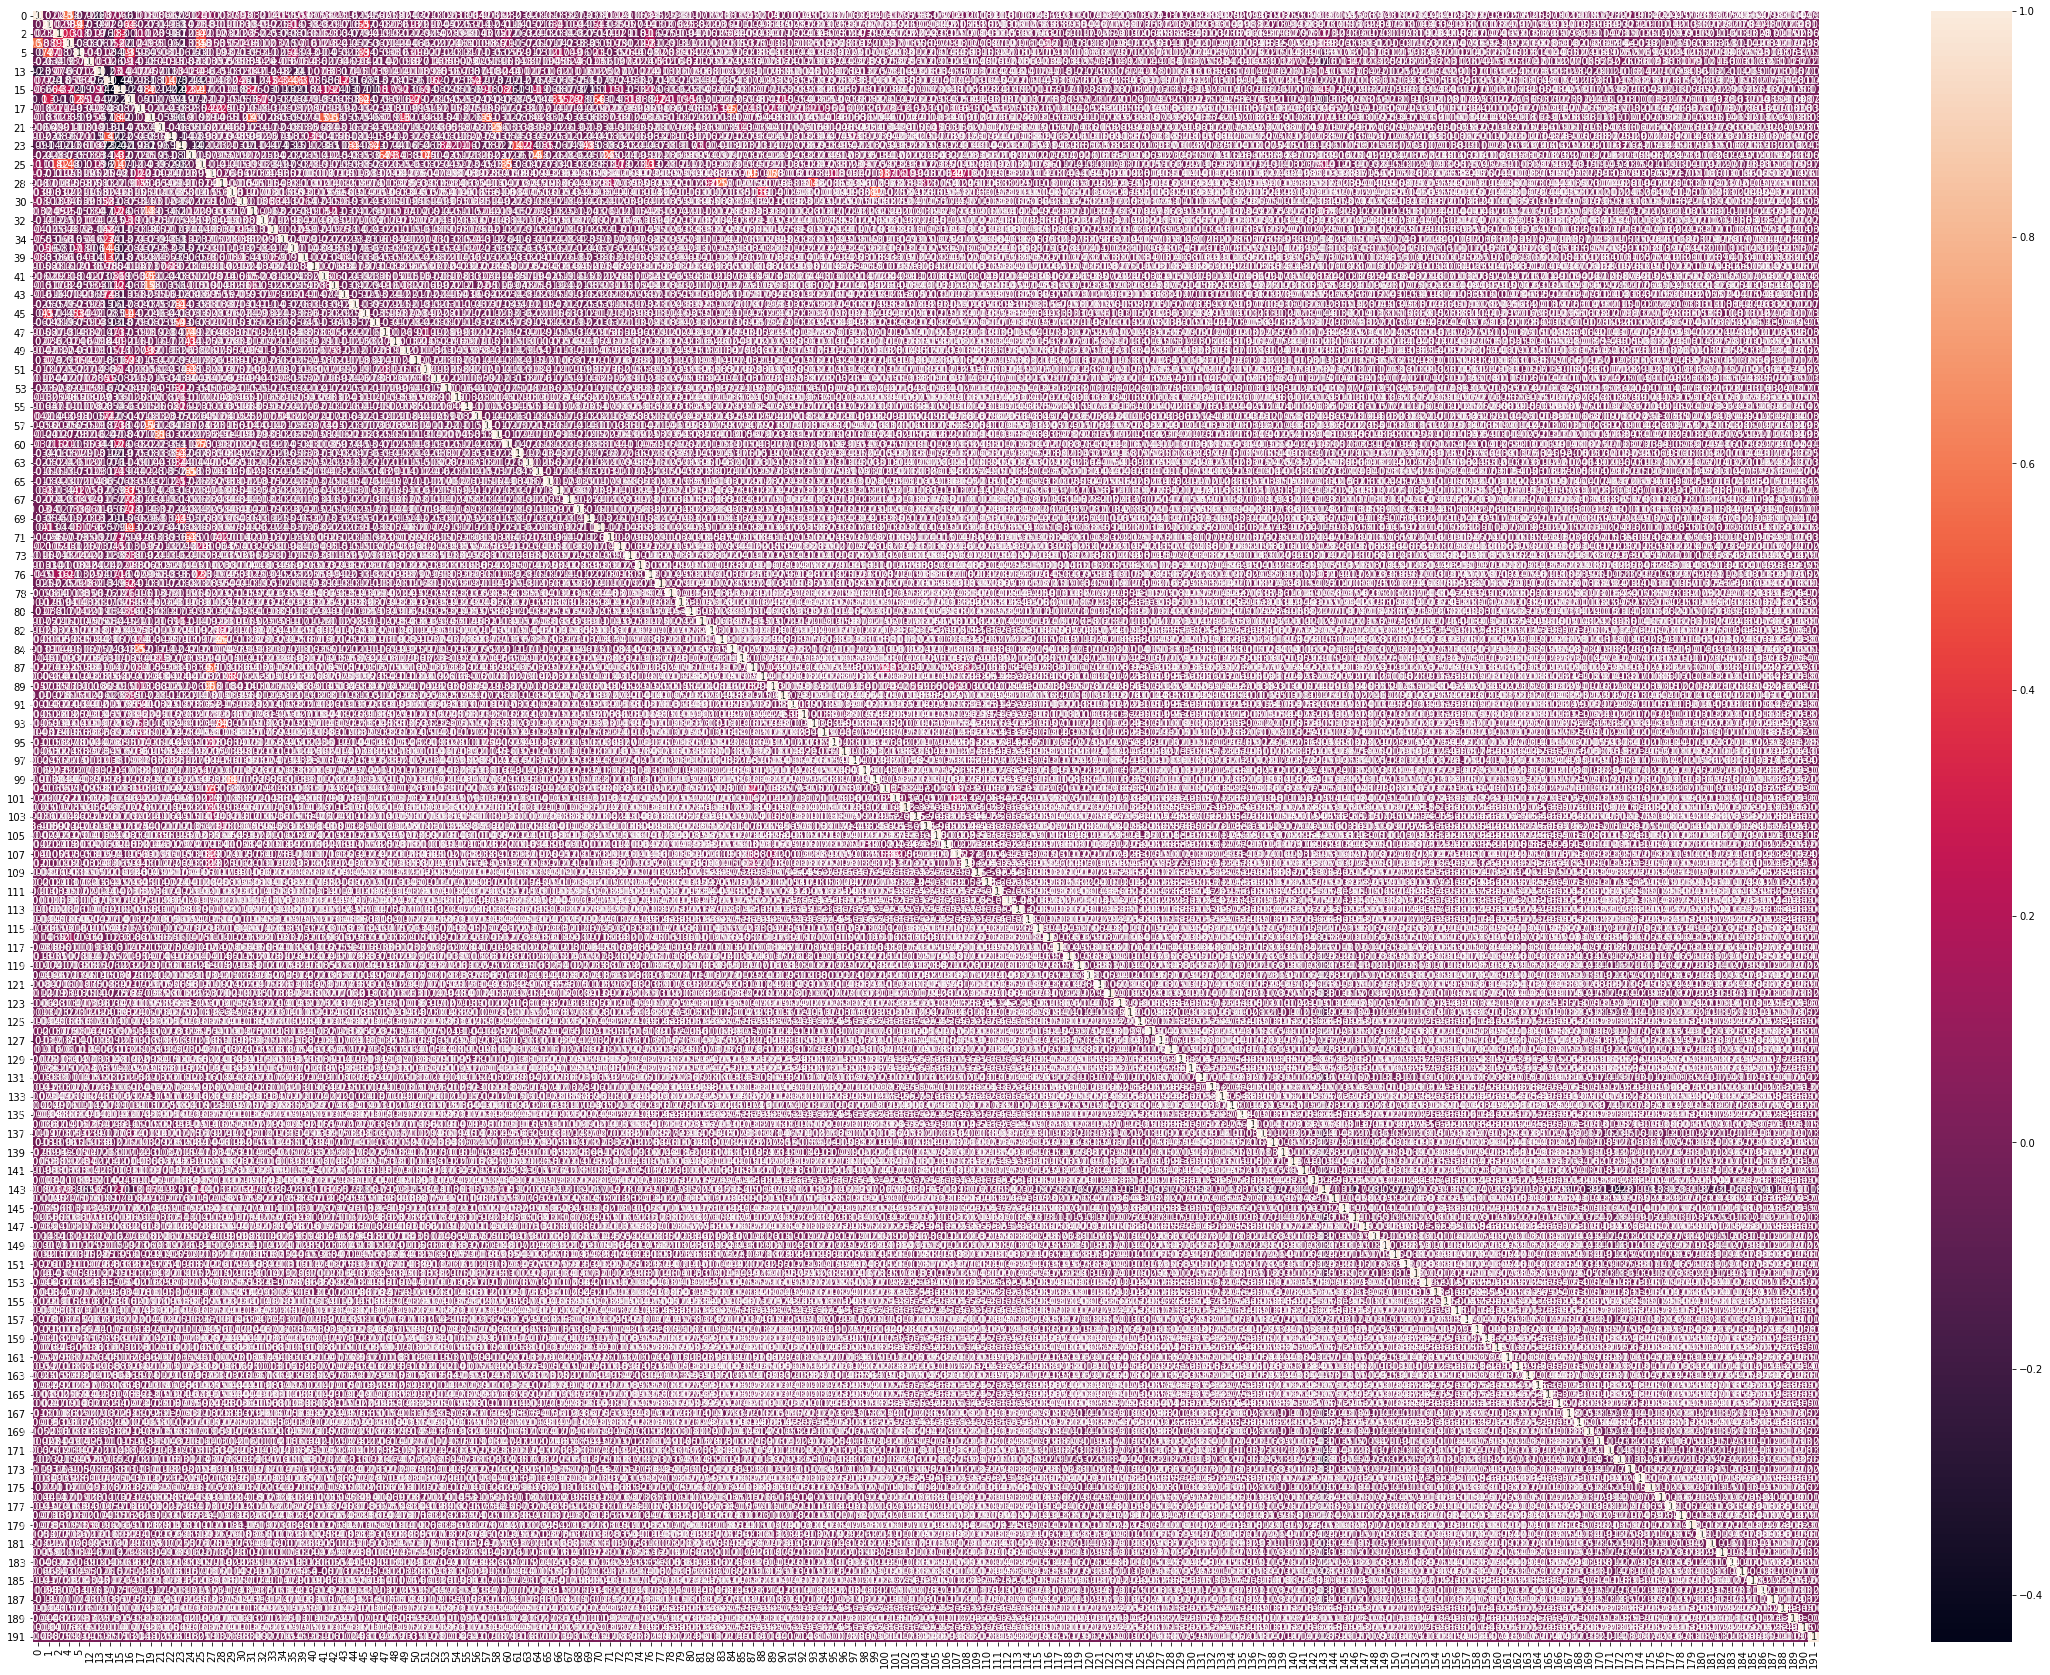

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(40, 30))
sns.heatmap(data_drop_corr.corr(), annot=True)
plt.show()

In [ ]:
from sklearn.decomposition import PCA
reduced = PCA(n_components=2).fit_transform(data_drop_corr)

In [146]:
def optimalK(data, nrefs=3, maxClusters=6):
    """
    Calculates KMeans optimal K using Gap Statistic from Tibshirani, Walther, Hastie
    Params:
        data: ndarry of shape (n_samples, n_features)
        nrefs: number of sample reference datasets to create
        maxClusters: Maximum number of clusters to test for
    Returns: (gaps, optimalK)
    """
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters)):

        # Holder for reference dispersion results
        refDisps = np.zeros(nrefs)

        # For n references, generate random sample and perform kmeans getting resulting dispersion of each loop
        for i in range(nrefs):
            
            # Create new random reference set
            randomReference = np.random.random_sample(size=data.shape)
            
            # Fit to it
            km = KMeans(k)
            km.fit(randomReference)
            
            refDisp = km.inertia_
            refDisps[i] = refDisp

        # Fit cluster to original data and create dispersion
        km = KMeans(k)
        km.fit(data)
        
        origDisp = km.inertia_

        # Calculate gap statistic
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)

        # Assign this loop's gap statistic to gaps
        gaps[gap_index] = gap
        
        resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)

    return (gaps.argmax() + 1, resultsdf)  # Plus 1 because index of 0 means 1 cluster is optimal, index 2 = 3 clusters are optimal

In [147]:
from sklearn.cluster import KMeans
gapdf, k = optimalK(data_drop_corr)

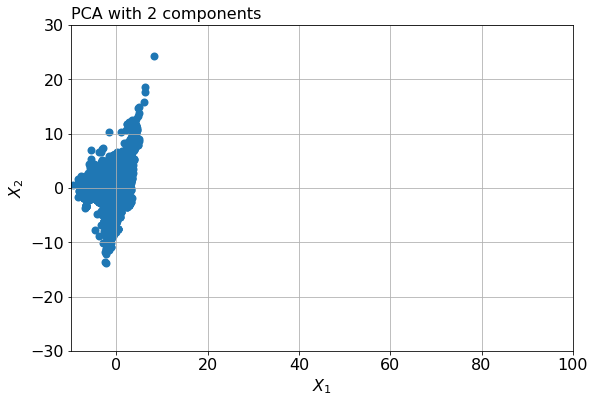

In [148]:
pca = PCA(n_components=2)
pca.fit(data_drop_corr)
X_pca_2 = pca.transform(data_drop_corr)
plt.figure(figsize=(9, 6))
plt.scatter(X_pca_2[:, 0], X_pca_2[:, 1], linewidth=2, marker="o")
plt.xticks(size=16)
plt.yticks(size=16)
plt.xlabel(r'$X_{1}$', size=16)
plt.ylabel(r'$X_{2}$', size=16)
plt.title("PCA with 2 components", loc='left', size=16)
plt.grid(b=1)
plt.xlim(-10, 100)
plt.ylim(-30, 30)
plt.show()

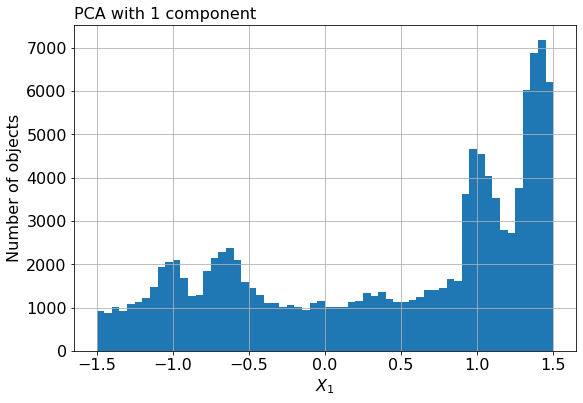

In [149]:
pca = PCA(n_components=1)
pca.fit(data_drop_corr)
X_pca_1 = pca.transform(data_drop_corr)
plt.figure(figsize=(9, 6))
bins = np.linspace(-1.5, 1.5, 61)
plt.hist(X_pca_1[:, 0], bins=bins)
plt.xticks(size=16)
plt.yticks(size=16)
plt.xlabel(r'$X_{1}$', size=16)
plt.ylabel(r'Number of objects', size=16)
plt.title("PCA with 1 component", loc='left', size=16)
plt.grid(b=1)
plt.show()

In [150]:
plt.plot(gapdf.clusterCount, gapdf.gap, linewidth=3)
plt.scatter(gapdf[gapdf.clusterCount == k].clusterCount, gapdf[gapdf.clusterCount == k].gap, s=250, c='r')
plt.grid(True)
plt.xlabel('Cluster Count')
plt.ylabel('Gap Value')
plt.title('Gap Values by Cluster Count')
plt.show()

AttributeError: ignored

In [ ]:


pca = PCA(n_components=50)
clusterer_3 = KMeans(n_clusters=3, random_state=11, n_jobs=-1)
clusterer_3.fit(pca.fit_transform(data_drop_corr))
labels_3 = clusterer_3.predict(pca.fit_transform(data_drop_corr))
pca = PCA(n_components=50)
clusterer_4 = KMeans(n_clusters=4, random_state=11, n_jobs=-1)
clusterer_4.fit(pca.fit_transform(data_drop_corr))
labels_4 = clusterer_4.predict(pca.fit_transform(data_drop_corr))
pca = PCA(n_components=50)
clusterer_5 = KMeans(n_clusters=5, random_state=11, n_jobs=-1)
clusterer_5.fit(pca.fit_transform(data_drop_corr))
labels_5 = clusterer_5.predict(pca.fit_transform(data_drop_corr))

In [ ]:
def plot_clusters_2D(X, labels):
 pca = PCA(n_components=2)
 pca.fit(X)
 X_pca_2 = pca.transform(X)
 plt.figure(figsize=(9, 6))
 for lab in np.unique(labels):
  plt.scatter(X_pca_2[labels==lab, 0], X_pca_2[labels==lab, 1], linewidth=2, marker="x", label=str(lab))
 plt.xticks(size=16)
 plt.yticks(size=16)
 plt.xlabel(r'$X_{1}$', size=16)
 plt.ylabel(r'$X_{2}$', size=16)
 plt.title("PCA with 2 components", loc='left', size=16)
 plt.legend(loc='best', fontsize=16)
 plt.grid(b=1)
 plt.show()

In [ ]:
plot_clusters_2D(data_drop_corr, labels_3)

In [ ]:
plot_clusters_2D(data_drop_corr, labels_4)

In [ ]:
plot_clusters_2D(data_drop_corr, labels_5)

In [ ]:
pca = PCA(n_components=2)
pca.fit(data_drop_corr)
X_pca_2 = pca.transform(data_drop_corr)
plt.figure(figsize=(9, 6))
plt.scatter(X_pca_2[:, 0], X_pca_2[:, 1], linewidth=2, marker="o")
plt.xticks(size=16)
plt.yticks(size=16)
plt.xlabel(r'$X_{1}$', size=16)
plt.ylabel(r'$X_{2}$', size=16)
plt.title("PCA with 2 components", loc='left', size=16)
plt.grid(b=1)
plt.xlim(-10, 15)
plt.ylim(-30, 30)
plt.show()

In [ ]:
display['Кластер'] = labels_5 + 1

In [ ]:
display

In [ ]:
display.drop(columns=excluded, axis = 1).to_csv('витрина.csv', sep=';', encoding='cp1251')